In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay, classification_report, RocCurveDisplay,roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal, GlorotNormal, GlorotUniform
import tensorflow.keras.backend as K
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
X = data.drop(columns=['Class','Time'])
y = data['Class']

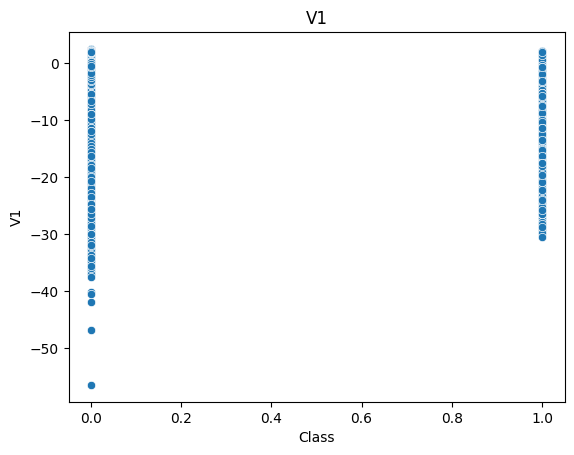

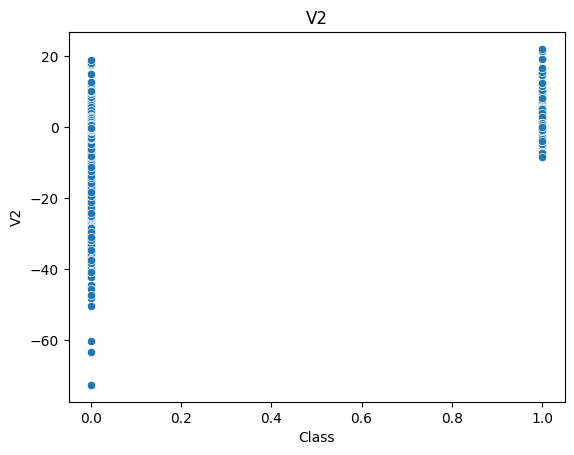

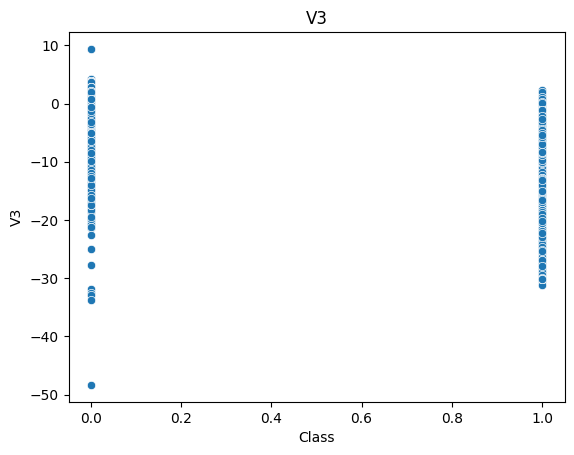

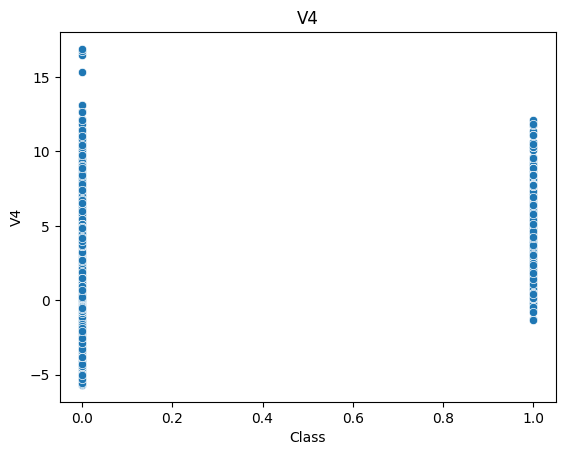

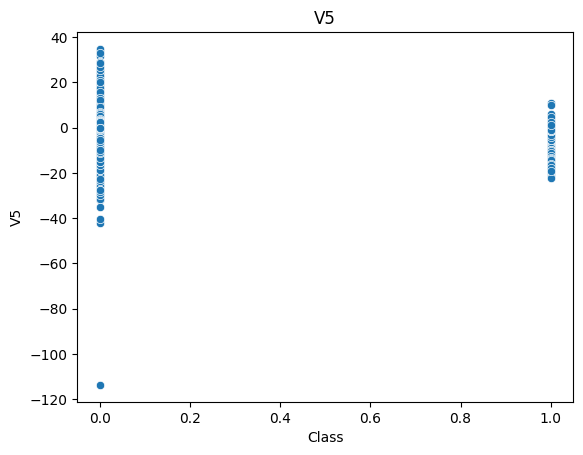

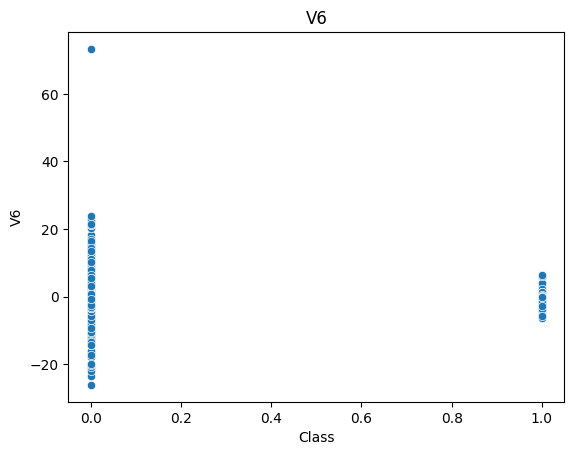

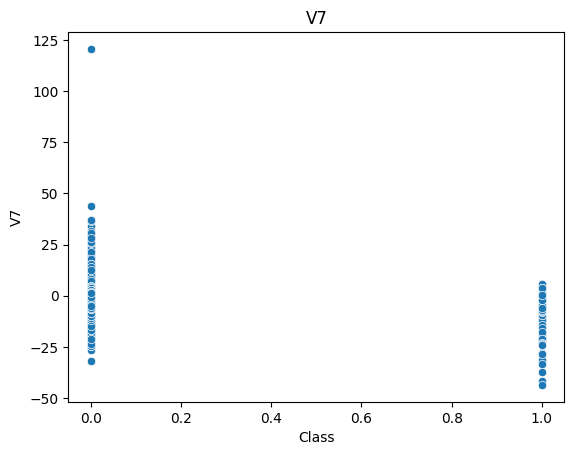

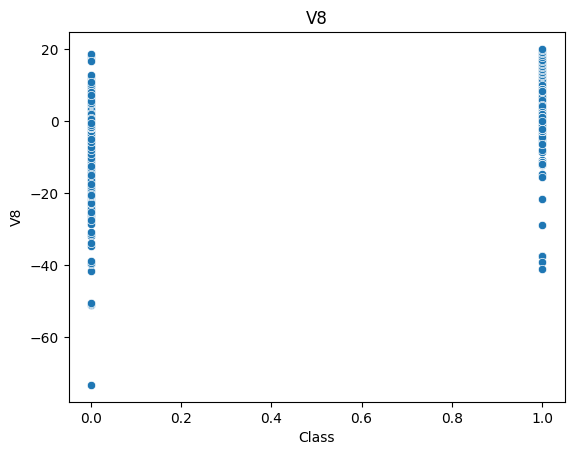

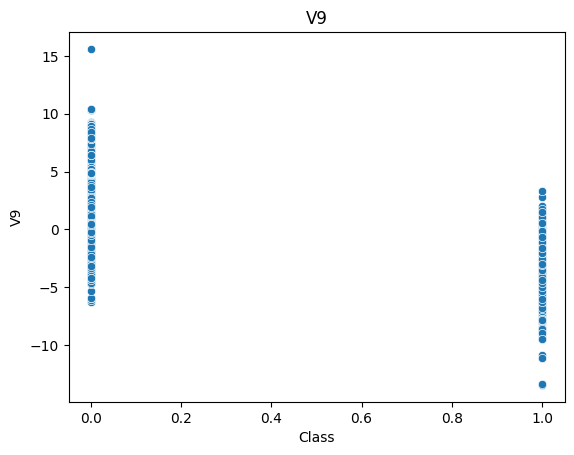

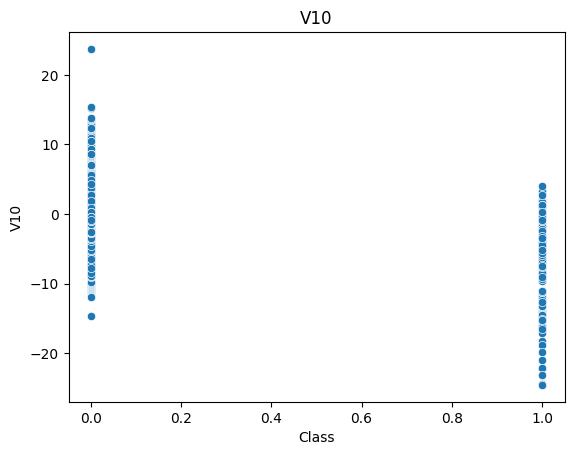

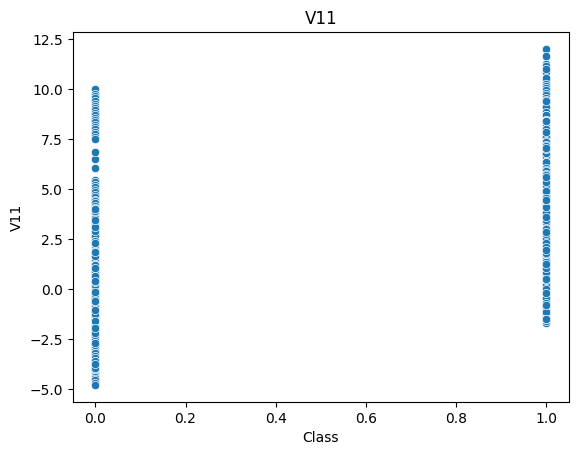

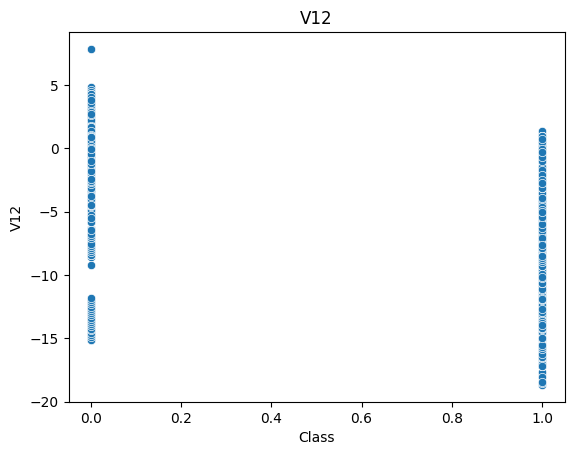

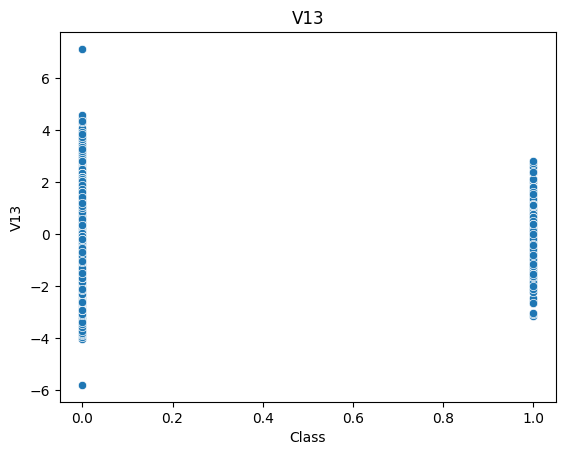

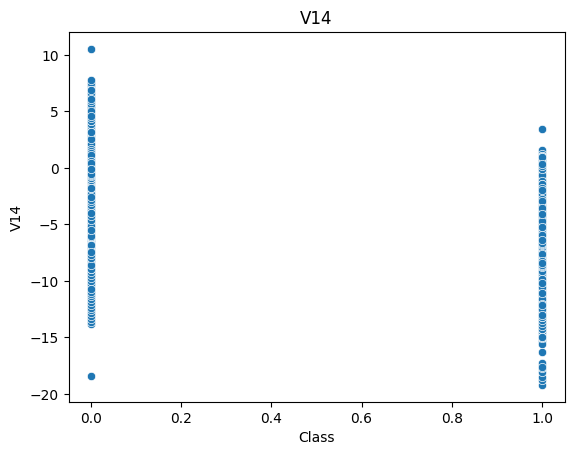

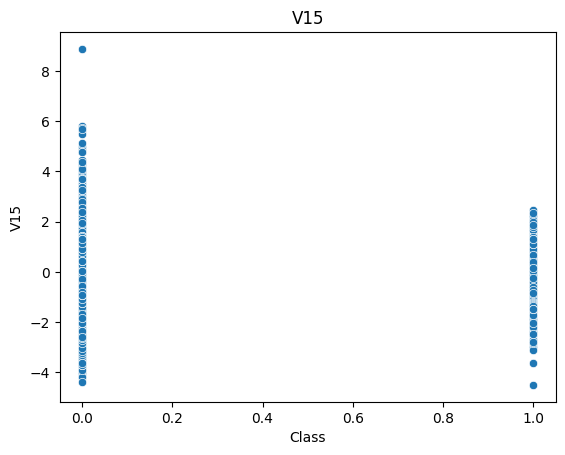

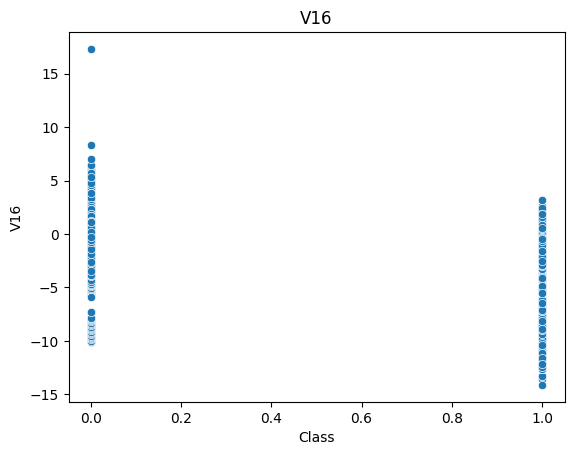

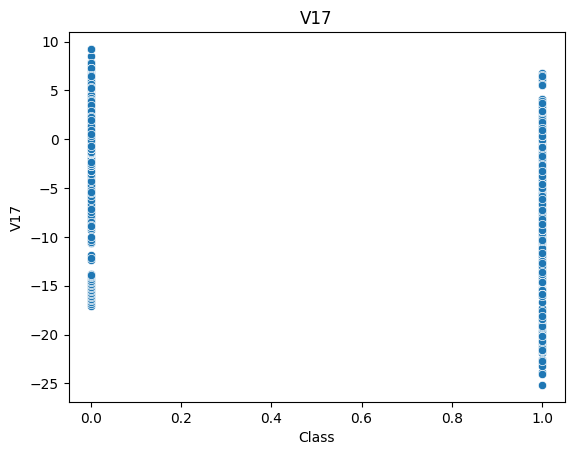

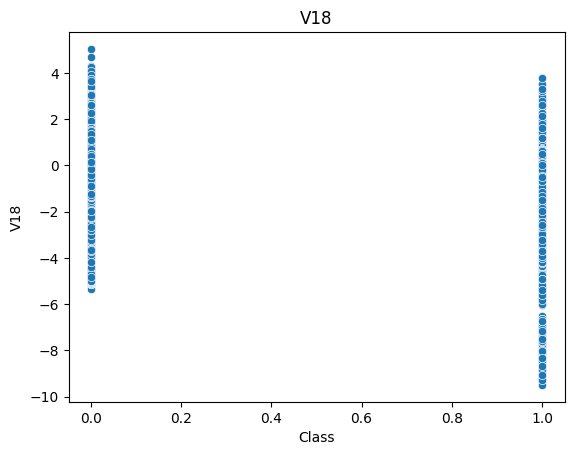

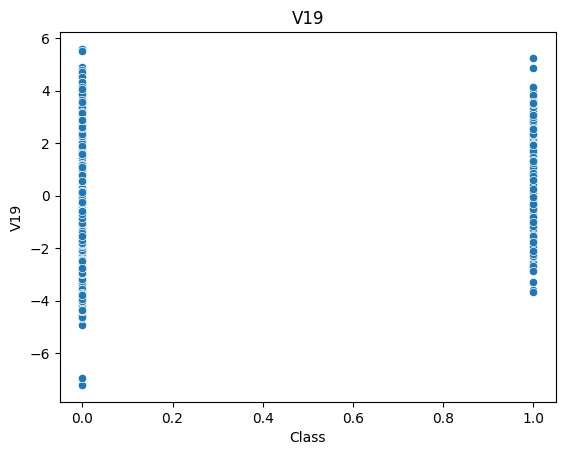

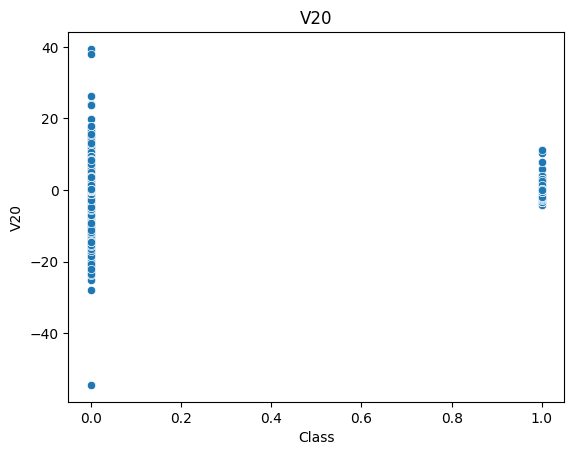

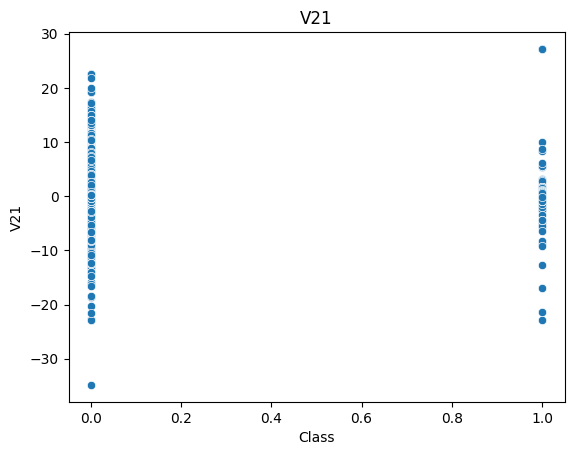

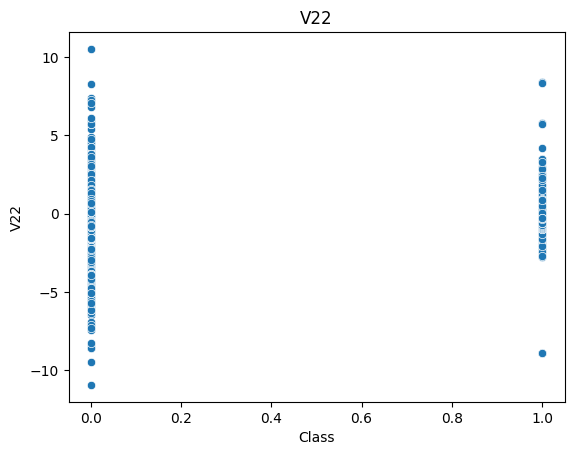

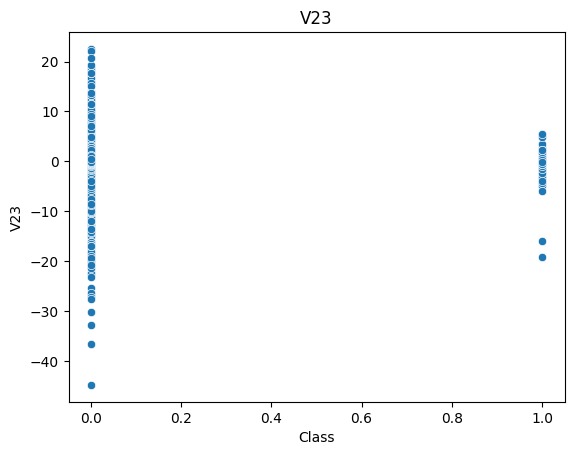

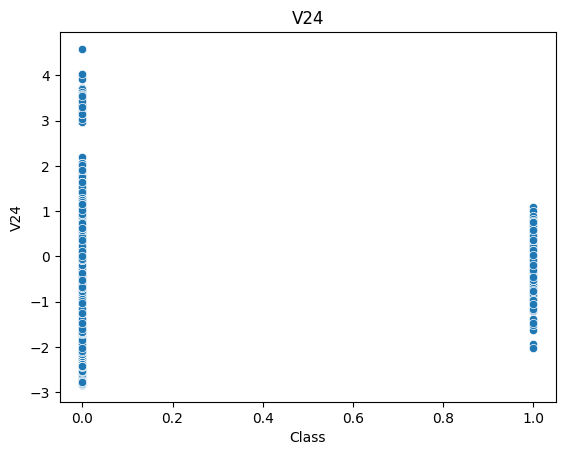

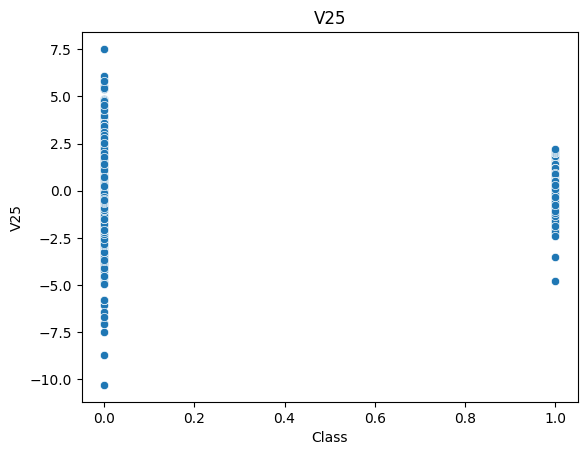

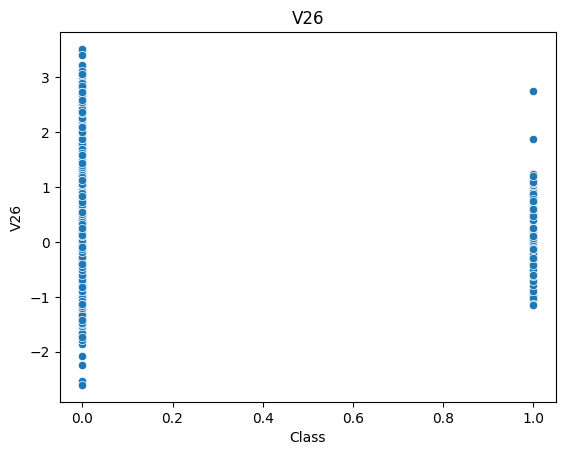

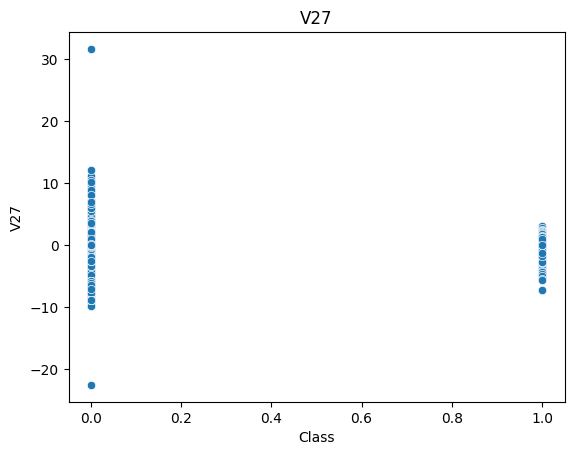

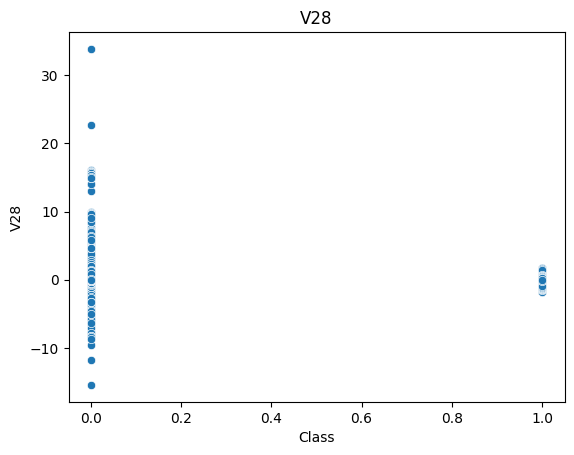

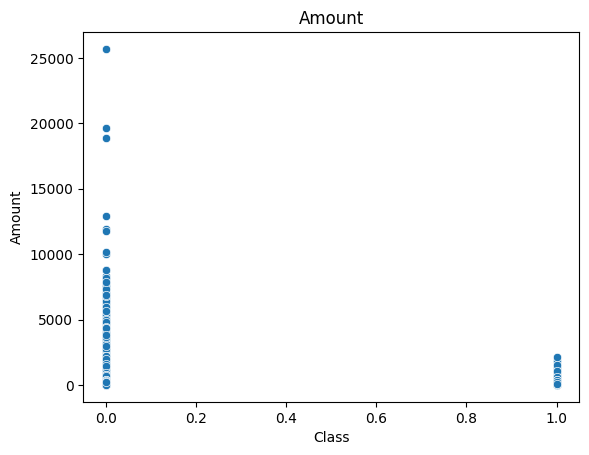

In [ ]:
for i in X.columns:
  plt.title(i)
  sns.scatterplot(data=data, x='Class',y=i)
  plt.show()

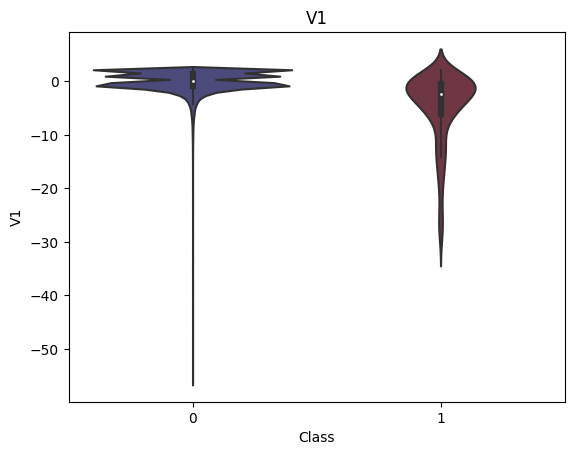

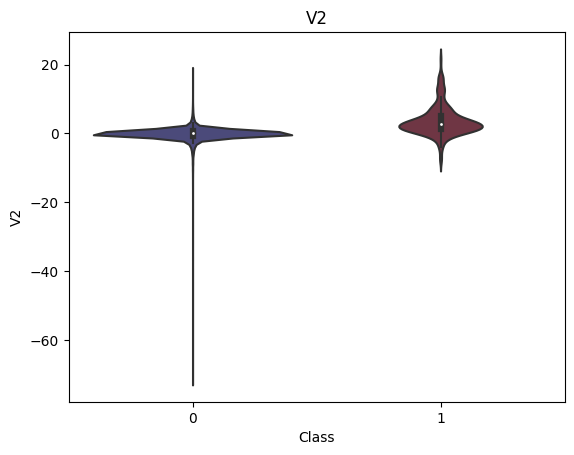

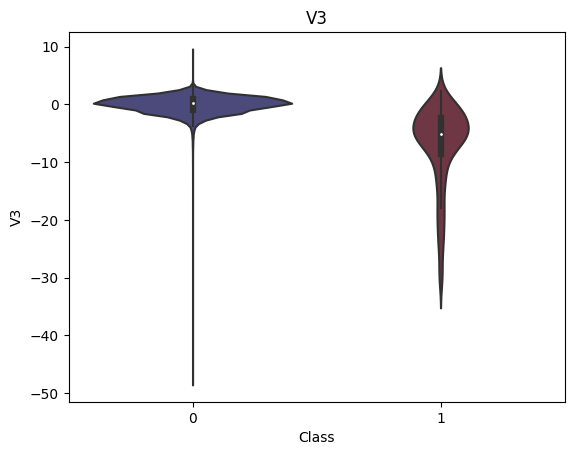

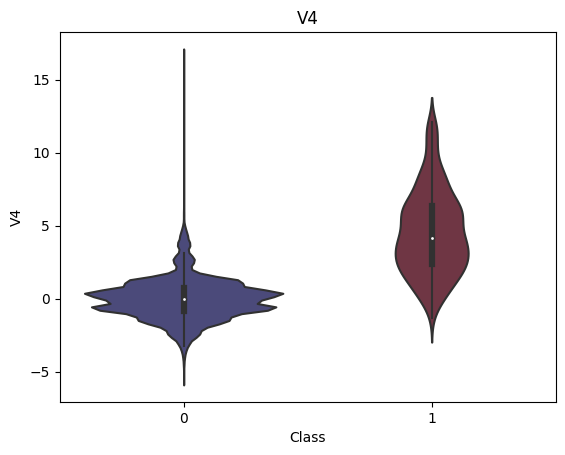

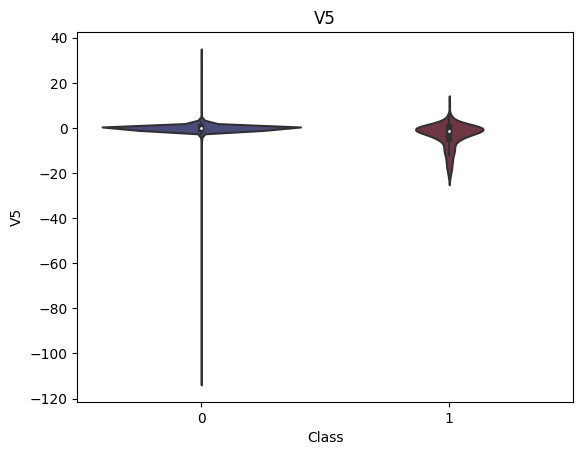

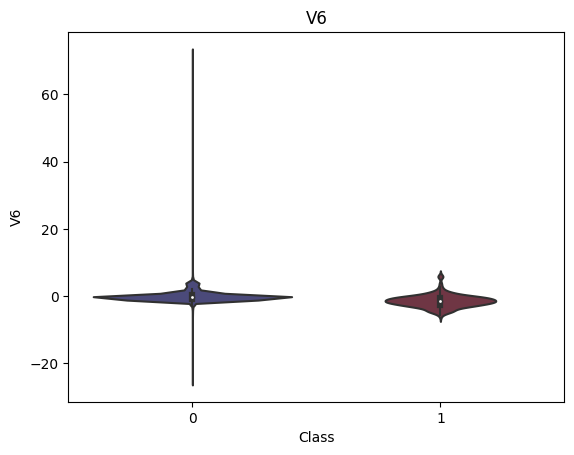

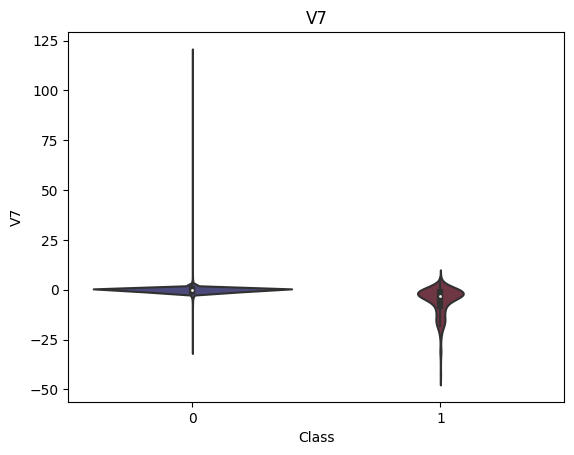

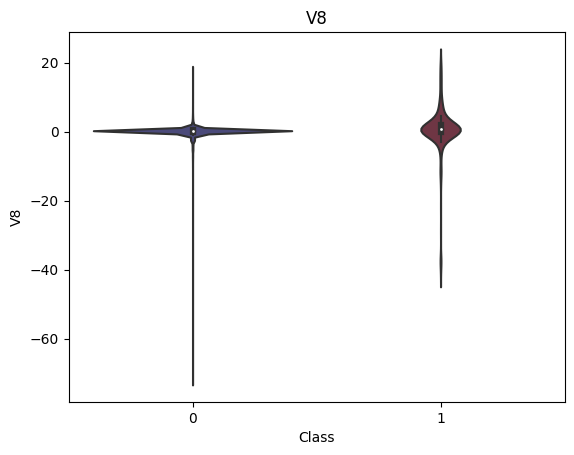

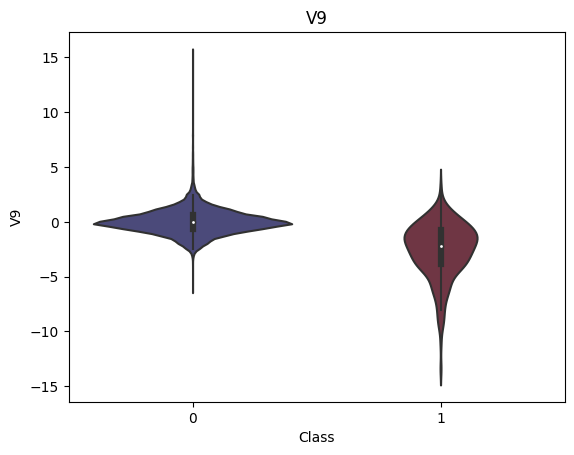

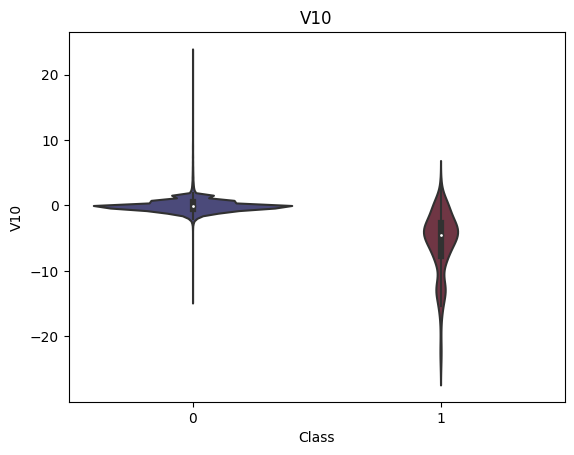

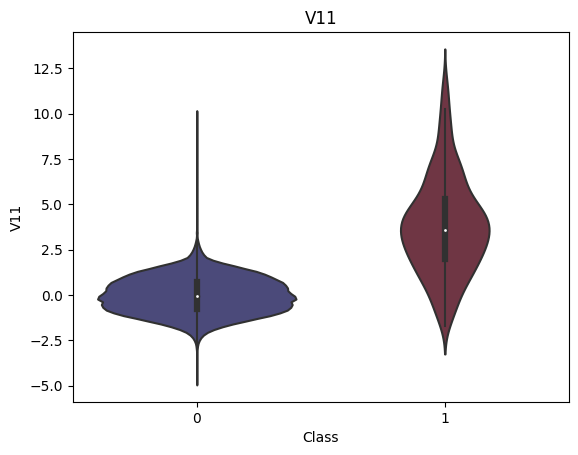

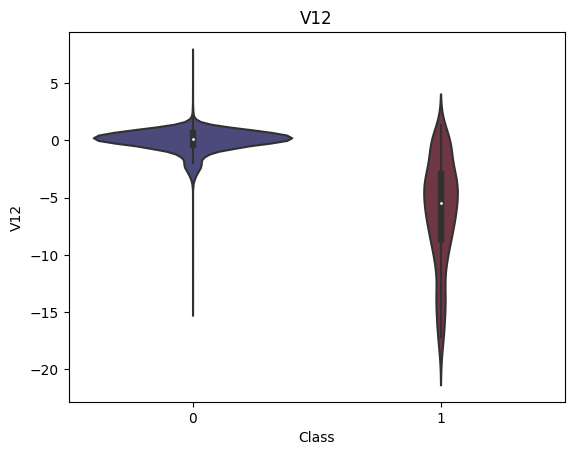

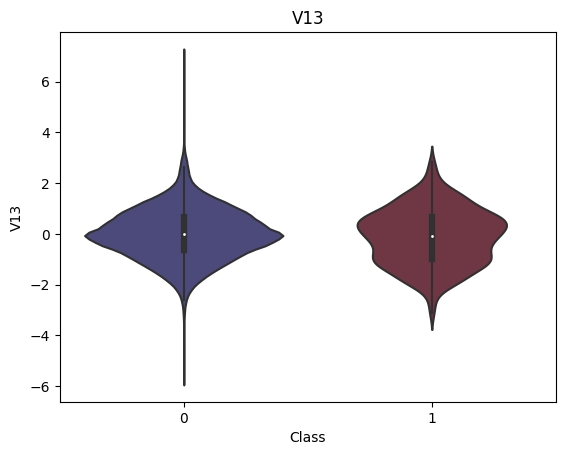

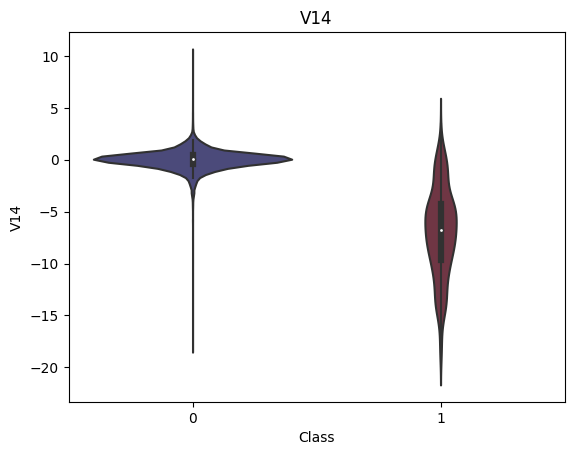

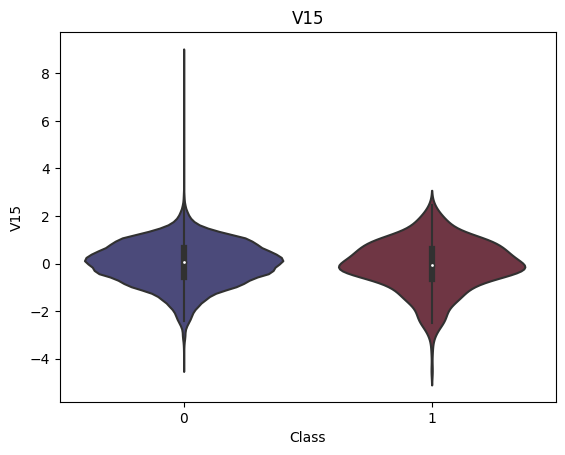

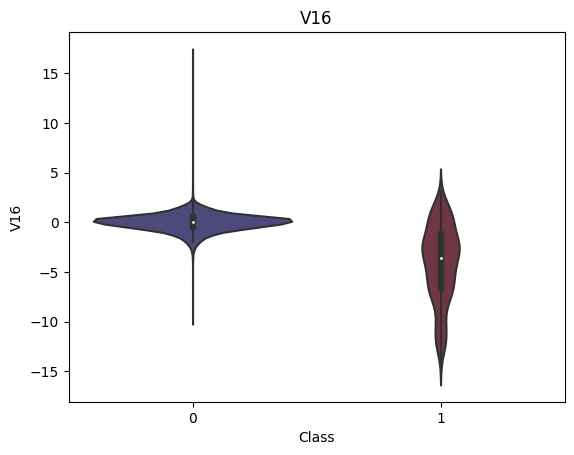

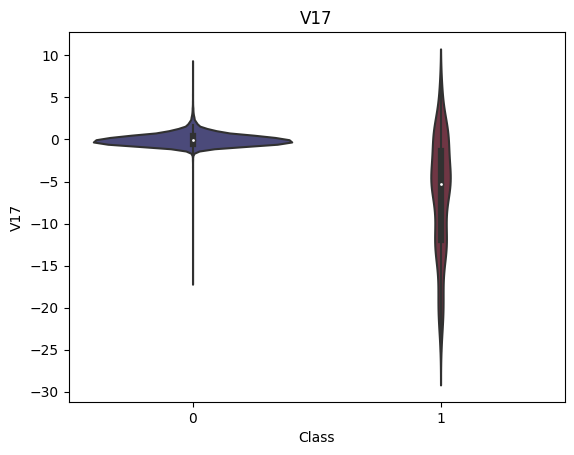

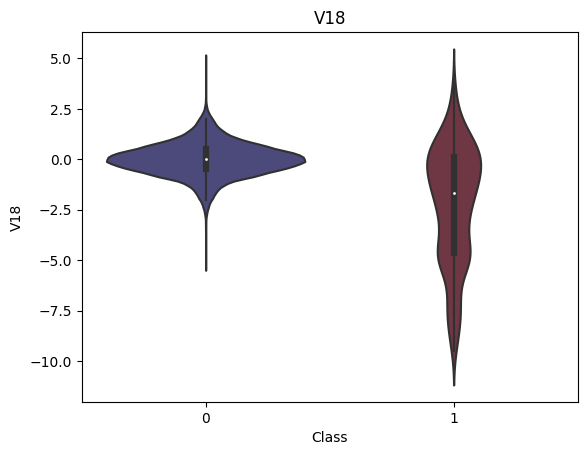

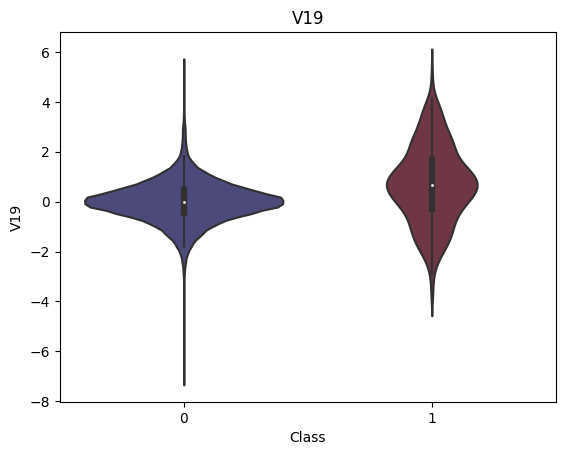

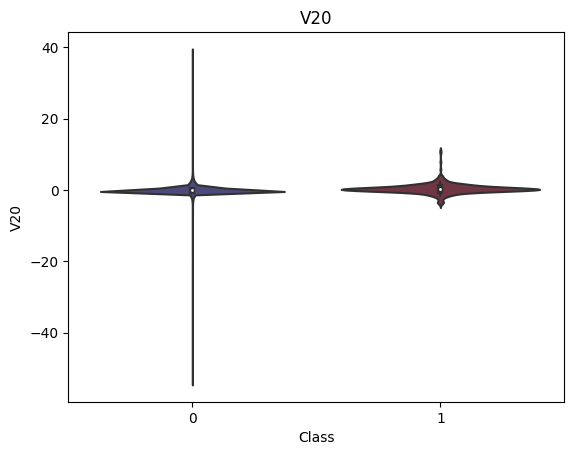

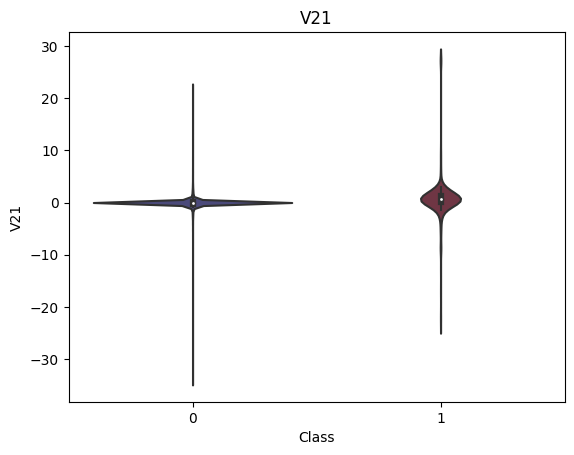

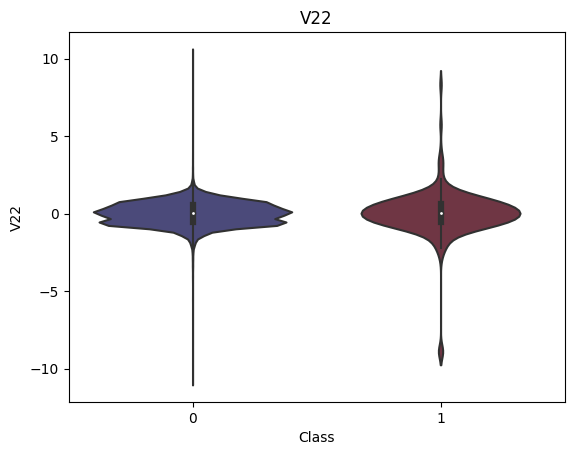

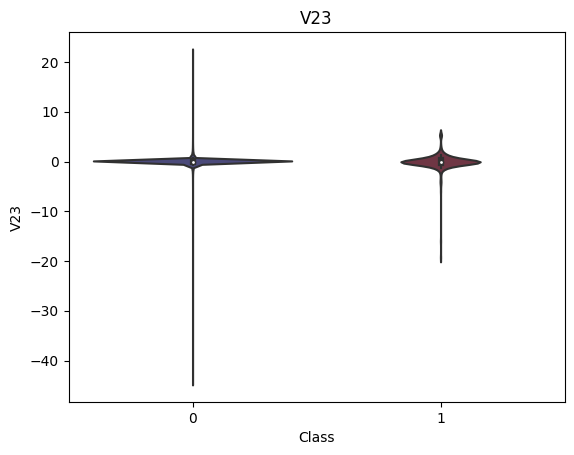

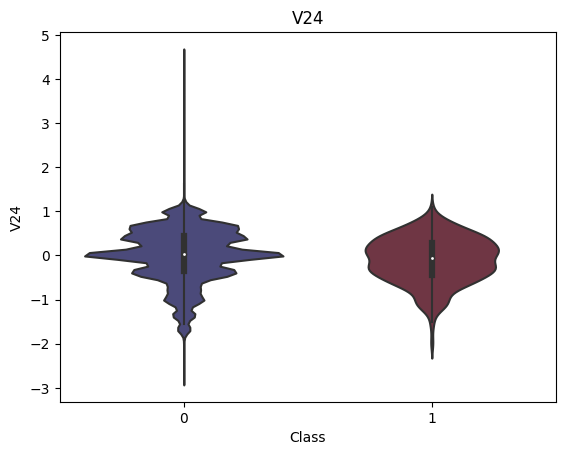

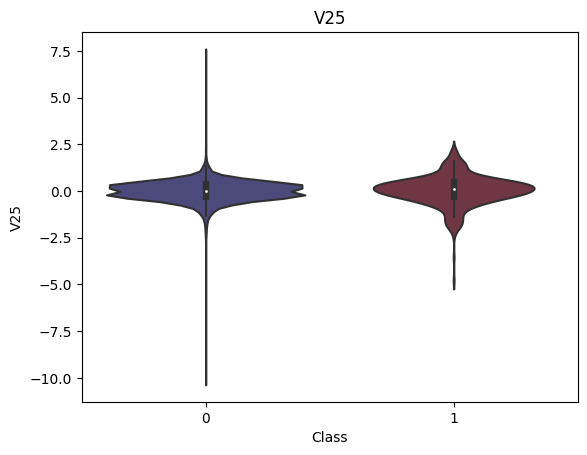

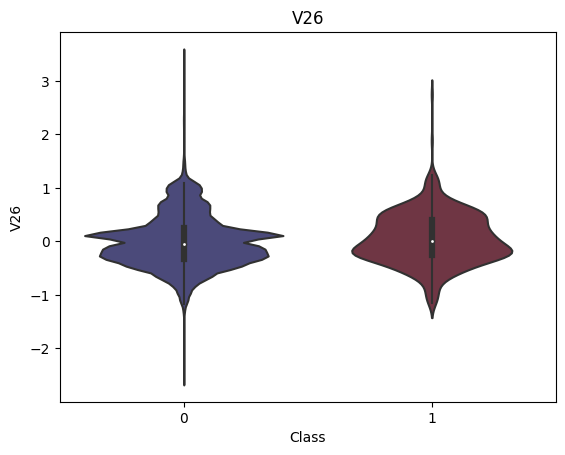

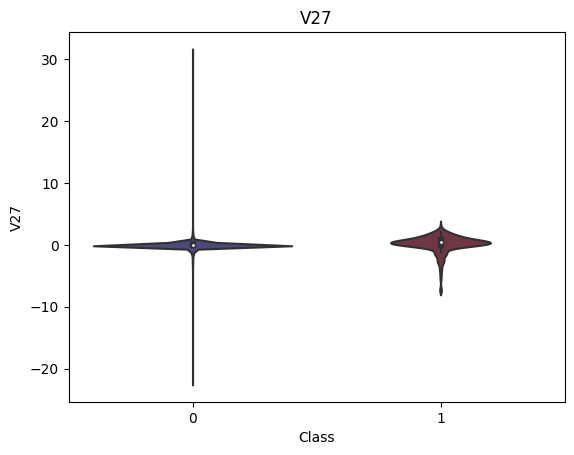

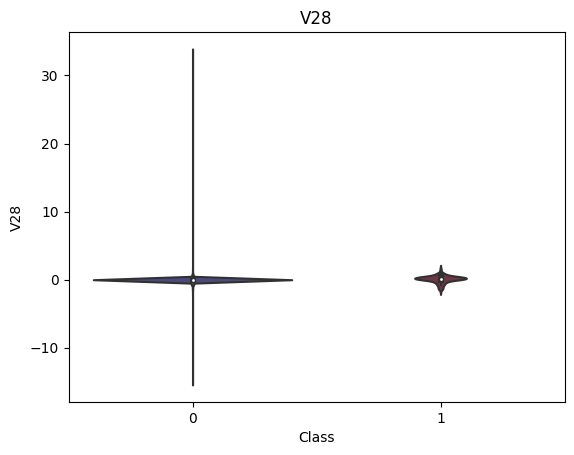

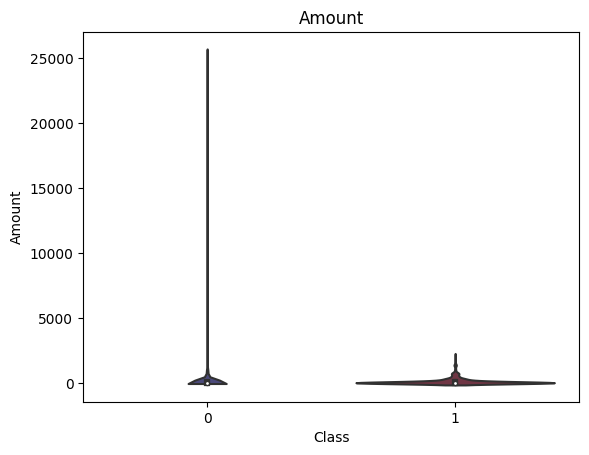

In [ ]:
for i in X.columns:
  plt.title(i)
  sns.violinplot(data=data, x='Class',y=i, palette='icefire')
  plt.show()

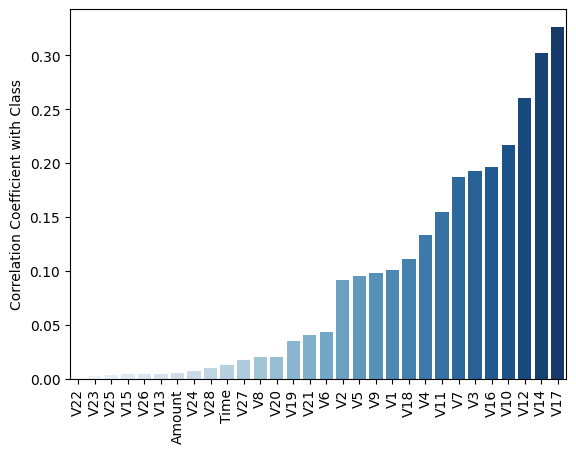

In [ ]:
c = abs(data.corr()['Class'][:30]).sort_values()
top_correlations_with_class = list(c.loc[c > .05].index)
sns.barplot(x = c.index, y = c.values, palette='Blues')
plt.xticks(rotation = 90)
plt.ylabel('Correlation Coefficient with Class')
plt.show()

In [ ]:
best_feats = ['V2', 'V3', 'V4', 'V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
X_f = data[best_feats]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
smo = SMOTE(random_state=0)
X_ovr, y_ovr = ros.fit_resample(X_train, y_train)
X_und, y_und = rus.fit_resample(X_train, y_train)
X_s, y_s = smo.fit_resample(X_train, y_train)

In [7]:
class cond_GAN():
    def __init__(self):
        #Setting optimizer as Adam optimizer each time a model is compiled
        opt = 'adam'
        #Creating/building the discriminator model using the dis_create function
        self.dis = self.dis_create()
        self.dis.compile(loss = ['binary_crossentropy'], optimizer = opt, metrics = ['accuracy'])
        #Creating/building the generator model using the gen_create function
        self.gen = self.gen_create()
        #Generating new data points 
        add_noise = Input(shape = (32,))
        sample_label = Input(shape = (1,))
        gen_samples = self.gen([add_noise, sample_label])
        self.dis.trainable = False
        #Feeding the generated samples into discriminator
        real = self.dis([gen_samples, sample_label])
        #Combining the models
        self.combined = Model([add_noise, sample_label], real)
        self.combined.compile(loss = ['binary_crossentropy'], optimizer = opt, metrics = ['accuracy'])
    #Defining the generator with its architecture
    def gen_create(self):
        #Initializing to Glorot normal
        initial = GlorotNormal()
        gen = Sequential()
        gen.add(Dense(256, input_dim = 32, activation = 'relu'))
        gen.add(BatchNormalization())
        gen.add(Dropout(.2))
        gen.add(Dense(256, activation = 'relu'))
        gen.add(BatchNormalization())
        gen.add(Dropout(.2))
        gen.add(Dense(512, activation = 'relu'))
        gen.add(BatchNormalization())
        gen.add(Dropout(.2))
        gen.add(Dense(1024, activation = 'relu'))
        gen.add(BatchNormalization())
        gen.add(Dropout(.2))
        gen.add(Dense(29, activation = 'sigmoid'))
        add_noise = Input(shape = (32, ))
        sample_labels = Input(shape = (1, ))
        embed_sample_labels = Flatten()(Embedding(2, 32)(sample_labels))
        gen_input = multiply([add_noise, embed_sample_labels])
        gen_sample = gen(gen_input)
        return Model([add_noise, sample_labels], gen_sample)
    #Defining the discriminator with its architecture
    def dis_create(self):
        #Initializing to Glorot normal
        initial = GlorotNormal()
        dis = Sequential()
        dis.add(Dense(1028, input_dim = 29, kernel_initializer = initial))
        dis.add(LeakyReLU(alpha = .01))
        dis.add(BatchNormalization())
        dis.add(Dropout(.1))
        dis.add(Dense(512, kernel_initializer = initial))
        dis.add(LeakyReLU(alpha = .01))
        dis.add(BatchNormalization())
        dis.add(Dropout(.1))
        dis.add(Dense(256, kernel_initializer = initial))
        dis.add(LeakyReLU(alpha = .01))
        dis.add(BatchNormalization())
        dis.add(Dropout(.1))
        dis.add(Dense(128, kernel_initializer=initial))
        dis.add(LeakyReLU(alpha = .01))
        dis.add(BatchNormalization())
        dis.add(Dropout(.1))
        dis.add(Dense(1, activation = 'sigmoid'))
        gen_sample = Input(shape = (29, ))
        sample_labels = Input(shape = (1, ))
        embed_sample_labels = Flatten()(Embedding(2, 29)(sample_labels))
        dis_inputs = multiply([gen_sample, embed_sample_labels])
        actual = dis(dis_inputs)
        return Model(inputs = [gen_sample, sample_labels], outputs = actual)

    def Training(self, X_train, y_train, fraud_, legit_, epochs, batch_size = 32):
        #Making arrays of ones and zeros, the ones are signifying real samples, zeros signify fake samples
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        #Looping through epochs to batch train
        for epoch in range(epochs):
            #Train Discriminator with 12 sample from postivite class and rest with negative class
            fraud = np.random.choice(fraud_, 12)
            legit = np.random.choice(legit_, batch_size - 12)
            i = np.concatenate((fraud, legit))
            samples, sample_labels = X_train[i], y_train[i]
            samples, sample_labels = shuffle(samples, sample_labels)
            #Adding noise to the model
            add_noise = np.random.normal(0, 1, (batch_size, 32))
            #Generating new batch of labels
            gen_samples = self.gen.predict([add_noise, sample_labels])
            #Training discriminator, then setting trainable to false afterwards
            self.dis.trainable = True
            dis_real_loss = self.dis.train_on_batch([samples, sample_labels], real)
            dis_fake_loss = self.dis.train_on_batch([gen_samples, sample_labels], fake)
            dis_loss_combined = (np.array(dis_real_loss) + dis_fake_loss) * .5
            #Implementing the conditions
            self.dis.trainable = False
            new_sample_labels = np.random.randint(0, 2, batch_size).reshape(-1, 1)
            #Training generator with the combined model that we made
            g_loss = self.combined.train_on_batch([add_noise, new_sample_labels], real)

In [20]:
cgan = cond_GAN()
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1, 1)
#Using np.where so we can get the index/position of the data point
fraud_ = np.where(y_train == 1)[0]
legit_ = np.where(y_train == 0)[0]
cgan.Training(X_train, y_train, fraud_, legit_, epochs = 20)

1/1 [==============================] - 0s 22ms/step


16/16 [==============================] - 0s 4ms/step
(500, 29)


<ipython-input-16-18cd1bb2c0dd>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gen_df = pd.DataFrame(data = gen_samples,columns = data.drop(['Class','Time'], 1).columns)


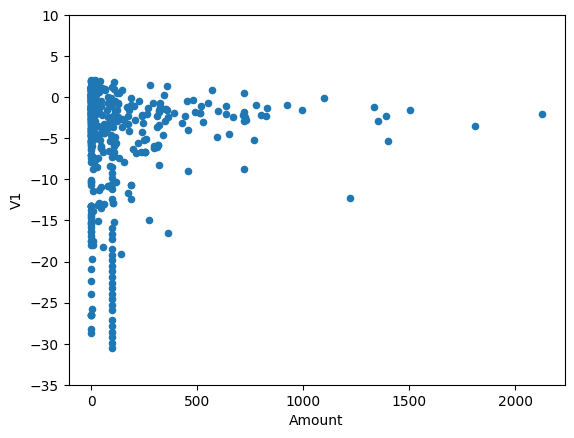

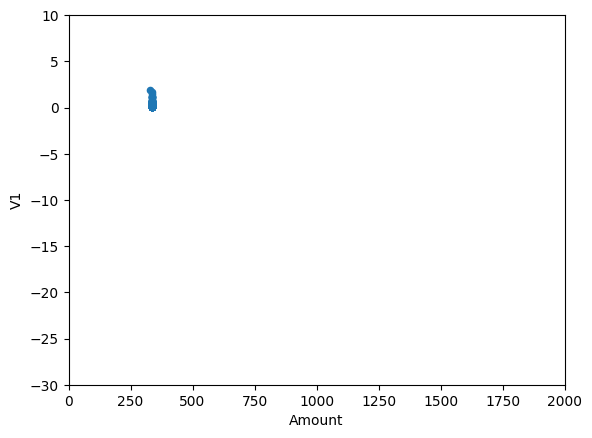

<ipython-input-16-18cd1bb2c0dd>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gen = pd.DataFrame(gen_samples, columns = data.drop(['Class', 'Time'], 1).columns)
<ipython-input-16-18cd1bb2c0dd>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_g = data_g.append(gen)


In [16]:
# generating new samples
num_samples = (y_train.shape[0] - y_train[y_train == 1].shape[0])
noise = np.random.normal(0, 1, (num_samples, 32))
sampled_labels = np.ones(num_samples).reshape(-1, 1)

gen_samples = cgan.gen.predict([noise, sampled_labels])
gen_samples = sc.inverse_transform(gen_samples)
print(gen_samples.shape)
gen_df = pd.DataFrame(data = gen_samples,columns = data.drop(['Class','Time'], 1).columns)
data[data['Class'] == 1].plot.scatter(x = 'Amount', y = 'V1')
plt.ylim(-35, 10)
gen_df.plot.scatter(x = 'Amount',y = 'V1')
plt.ylim(-30, 10)
plt.xlim(0, 2000)
plt.show()

gen = pd.DataFrame(gen_samples, columns = data.drop(['Class', 'Time'], 1).columns)
gen['Class'] = 1

data_g = data.drop(columns = ['Time'])
data_g = data_g.append(gen)
X_g = data_g.drop(columns = ['Class'])
y_g = data_g['Class']
X_traing, X_testg, y_traing, y_testg = train_test_split(X_g, y_g, test_size = .25, random_state = 0)

sc = StandardScaler()
X_traing = sc.fit_transform(X_traing)

In [40]:
#Building simple neural network model
nn = Sequential()
nn.add(Dense(32, input_shape = (29, ), activation = 'relu'))
nn.add(Dropout(.1))
nn.add(Dense(64, activation = 'relu'))
nn.add(Dense(128, activation = 'relu'))
nn.add(BatchNormalization())
nn.add(Dense(256, activation = 'relu'))
nn.add(Dropout(.1))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss = ['binary_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
#Preferrable to have somewhat higher recall value than precision since that indicates
#the amount of times that the model caught actual fraudulent transactions

Epoch 1/10
6685/6685 [==============================] - 18s 3ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 2/10
6685/6685 [==============================] - 17s 3ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/10
6685/6685 [==============================] - 17s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 4/10
6685/6685 [==============================] - 19s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 5/10
6685/6685 [==============================] - 17s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 6/10
6685/6685 [==============================] - 17s 2ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 7/10
6685/6685 [==============================] - 17s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0031 - val_ac

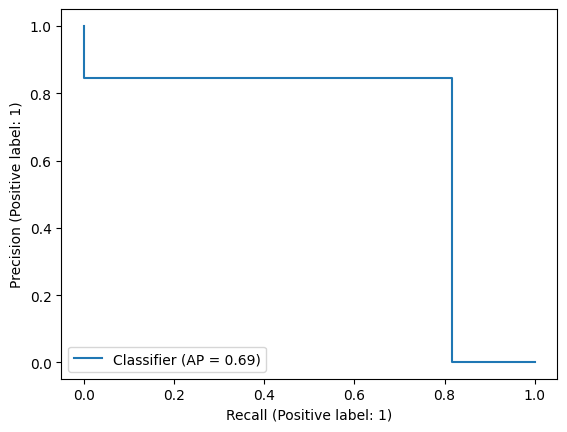

In [ ]:
#Training NN model on generated data
nn_g = nn.fit(X_traing, y_traing, epochs = 10, validation_data = (X_test, y_test))

pred = nn.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

In [ ]:
#Training NN model on oversampled data
#Recompiling model
nn.compile(loss = ['binary_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
nn_ovr = nn.fit(X_ovr, y_ovr, epochs = 10, validation_data = (X_test, y_test))

pred = nn.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

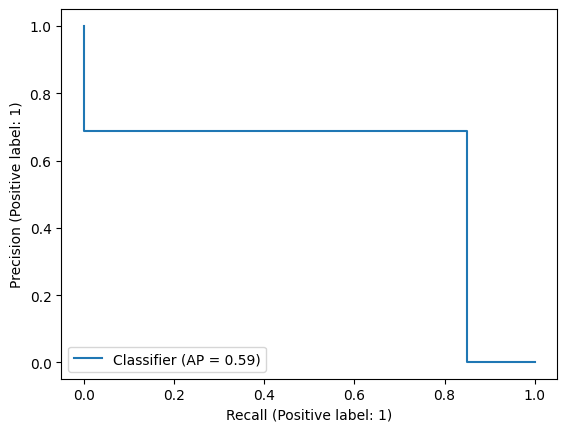

In [ ]:
#Training NN model on SMOTE data
nn.compile(loss = ['binary_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
nn_s = nn.fit(X_s, y_s, epochs = 10, validation_data = (X_test, y_test))

pred = nn.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

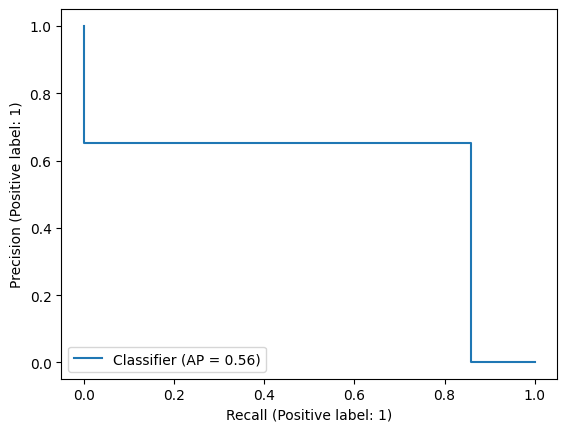

In [ ]:
#Training NN model on undersampled data
nn_und = nn.fit(X_und, y_und, epochs = 10, validation_data = (X_test, y_test))

pred = nn.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

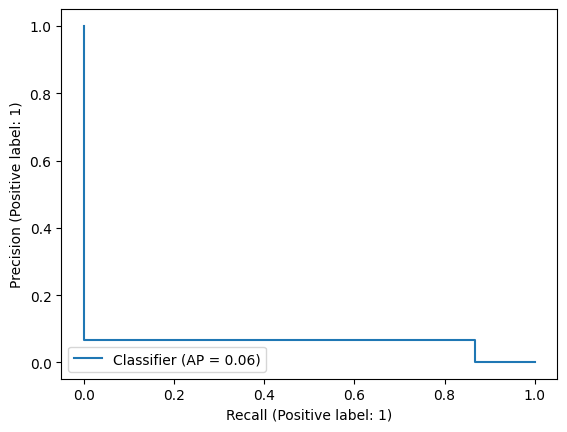

In [ ]:
#Random Forest Model trained on generated data
rf_gen = RandomForestClassifier(n_estimators = 10, random_state=0)
rf_gen.fit(X_traing, y_traing)

pred = rf_gen.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

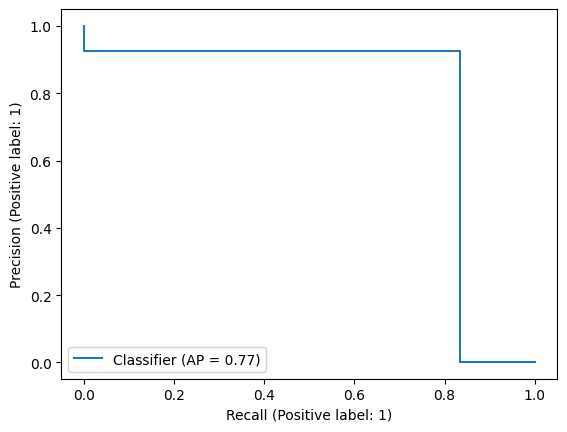

In [ ]:
#Random Forest Model trained on oversampled data
rf_ovr = RandomForestClassifier(n_estimators = 1000, random_state=0)
rf_ovr.fit(X_ovr, y_ovr)

pred = rf_ovr.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

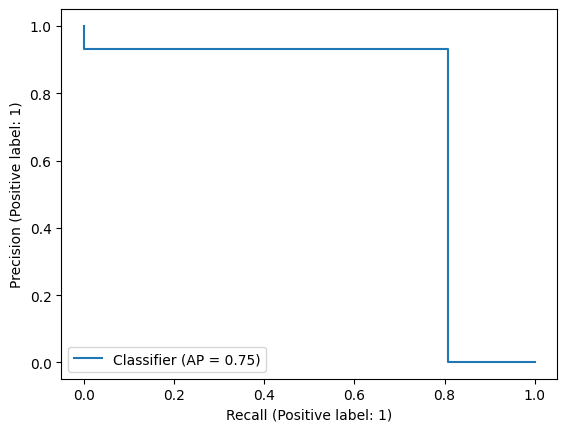

In [ ]:
#Random Forest Model trained on SMOTE data
rf_s = RandomForestClassifier(n_estimators = 1000, random_state=0)
rf_s.fit(X_s, y_s)

pred = rf_s.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

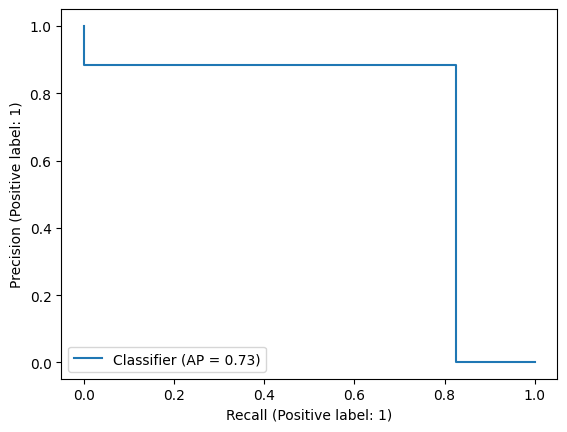

In [ ]:
#Random Forest Model trained on undersampled data
rf_und = RandomForestClassifier(n_estimators = 1000, random_state=0)
rf_und.fit(X_und, y_und)

pred = rf_und.predict(X_test)
preds = []
for i in range(len(pred)):
  preds.append(int(pred[i].round()))
PrecisionRecallDisplay.from_predictions(y_test, preds)
print(classification_report(y_test, preds, target_names = ['Not Fraud', 'Fraud']))

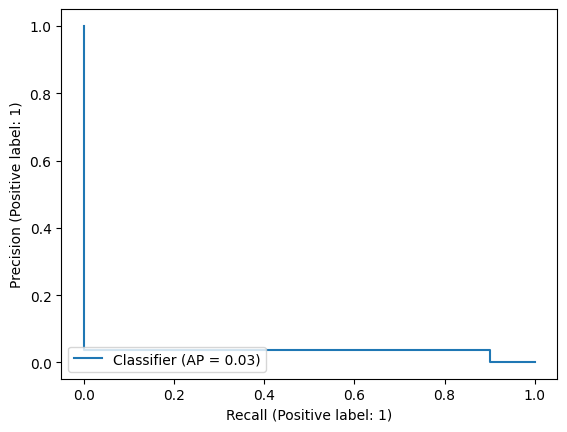